# Rain Prediction

The given dataset contains about 10 years of daily weather observations of different locations in Australia. 


Using the details of the dataset we need to predict:
1. Weather it will rain tomorrow (Classification)
2. How much rainfall could be there (Regression)


In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report,auc
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [3]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [4]:
data.shape

(8425, 23)

In [5]:
# Removing duplicates if any:
data=data.drop_duplicates(keep='first')
data.shape

(6762, 23)

In [6]:
data = data.reset_index()
data=data.drop(columns=['index'])

The dataset had duplicate values which we have deleted

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        6692 non-null   float64
 3   MaxTemp        6705 non-null   float64
 4   Rainfall       6624 non-null   float64
 5   Evaporation    3841 non-null   float64
 6   Sunshine       3526 non-null   float64
 7   WindGustDir    5820 non-null   object 
 8   WindGustSpeed  5820 non-null   float64
 9   WindDir9am     5968 non-null   object 
 10  WindDir3pm     6468 non-null   object 
 11  WindSpeed9am   6699 non-null   float64
 12  WindSpeed3pm   6662 non-null   float64
 13  Humidity9am    6708 non-null   float64
 14  Humidity3pm    6666 non-null   float64
 15  Pressure9am    5454 non-null   float64
 16  Pressure3pm    5451 non-null   float64
 17  Cloud9am       4896 non-null   float64
 18  Cloud3pm

The dataset has both numerical and categorical data

The dataset also seems to have null values

In [8]:
# checking for missing values
((data.isna().sum())/6762)*100

Date              0.000000
Location          0.000000
MinTemp           1.035197
MaxTemp           0.842946
Rainfall          2.040816
Evaporation      43.197279
Sunshine         47.855664
WindGustDir      13.930790
WindGustSpeed    13.930790
WindDir9am       11.742088
WindDir3pm        4.347826
WindSpeed9am      0.931677
WindSpeed3pm      1.478852
Humidity9am       0.798580
Humidity3pm       1.419698
Pressure9am      19.343390
Pressure3pm      19.387755
Cloud9am         27.595386
Cloud3pm         28.127773
Temp9am           0.754215
Temp3pm           1.360544
RainToday         2.040816
RainTomorrow      2.040816
dtype: float64

Most of the columns seem to have missing values

Will look at the unique values in each column and impute the columns using appropriate methods

In [9]:
si = SimpleImputer(strategy='most_frequent',missing_values=np.NaN)
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=si.fit_transform(data[i].values.reshape(-1,1))
            
si_mean=SimpleImputer(missing_values=np.NaN)
for i in data.columns:
    if data[i].dtypes=='float64':
        data[i]=si.fit_transform(data[i].values.reshape(-1,1))


In [10]:
data.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

All the missing data has been imputed

Let's have a closer look at the data

In [11]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Making changes to Date column:

1. Convert the column from object to datetime
2. Making new column for month
3. Deleting Date

In [12]:
#converting Date to Month and Year:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['Month']=data['Date'].dt.month
data=data.drop(columns=['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       6762 non-null   object 
 1   MinTemp        6762 non-null   float64
 2   MaxTemp        6762 non-null   float64
 3   Rainfall       6762 non-null   float64
 4   Evaporation    6762 non-null   float64
 5   Sunshine       6762 non-null   float64
 6   WindGustDir    6762 non-null   object 
 7   WindGustSpeed  6762 non-null   float64
 8   WindDir9am     6762 non-null   object 
 9   WindDir3pm     6762 non-null   object 
 10  WindSpeed9am   6762 non-null   float64
 11  WindSpeed3pm   6762 non-null   float64
 12  Humidity9am    6762 non-null   float64
 13  Humidity3pm    6762 non-null   float64
 14  Pressure9am    6762 non-null   float64
 15  Pressure3pm    6762 non-null   float64
 16  Cloud9am       6762 non-null   float64
 17  Cloud3pm       6762 non-null   float64
 18  Temp9am 

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,6762.0,13.110086,5.540674,-2.0,9.0,13.2,17.4,28.5
MaxTemp,6762.0,24.055368,6.147821,8.2,19.4,23.4,28.4,45.5
Rainfall,6762.0,2.723410,10.490138,0.0,0.0,0.0,0.8,371.0
Evaporation,6762.0,4.739796,3.405391,0.0,4.0,4.0,5.0,145.0
Sunshine,6762.0,4.114655,4.797188,0.0,0.0,0.2,9.2,13.9
WindGustSpeed,6762.0,38.980775,13.376460,7.0,30.0,39.0,46.0,107.0
WindSpeed9am,6762.0,12.663117,9.864326,0.0,6.0,11.0,19.0,63.0
WindSpeed3pm,6762.0,17.444395,9.604527,0.0,9.0,17.0,24.0,83.0
Humidity9am,6762.0,67.510500,17.182756,10.0,56.0,68.0,80.0,100.0
Humidity3pm,6762.0,50.403727,18.505890,6.0,38.0,50.0,62.0,99.0


The numerical features look good

There could be skewness and outliers which we will look into in detail during visualization

In [14]:
#Dividing data to numerical and categorical
C_data = data.select_dtypes(include=['object'])
C_data['Month']=data['Month']
N_data = data.select_dtypes(include=['int64', 'float64'])
N_data=N_data.drop(columns=['Month'])

In [15]:
C_data.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Month
0,Albury,W,W,WNW,No,No,12
1,Albury,WNW,NNW,WSW,No,No,12
2,Albury,WSW,W,WSW,No,No,12
3,Albury,NE,SE,E,No,No,12
4,Albury,W,ENE,NW,No,No,12


<function matplotlib.pyplot.show(close=None, block=None)>

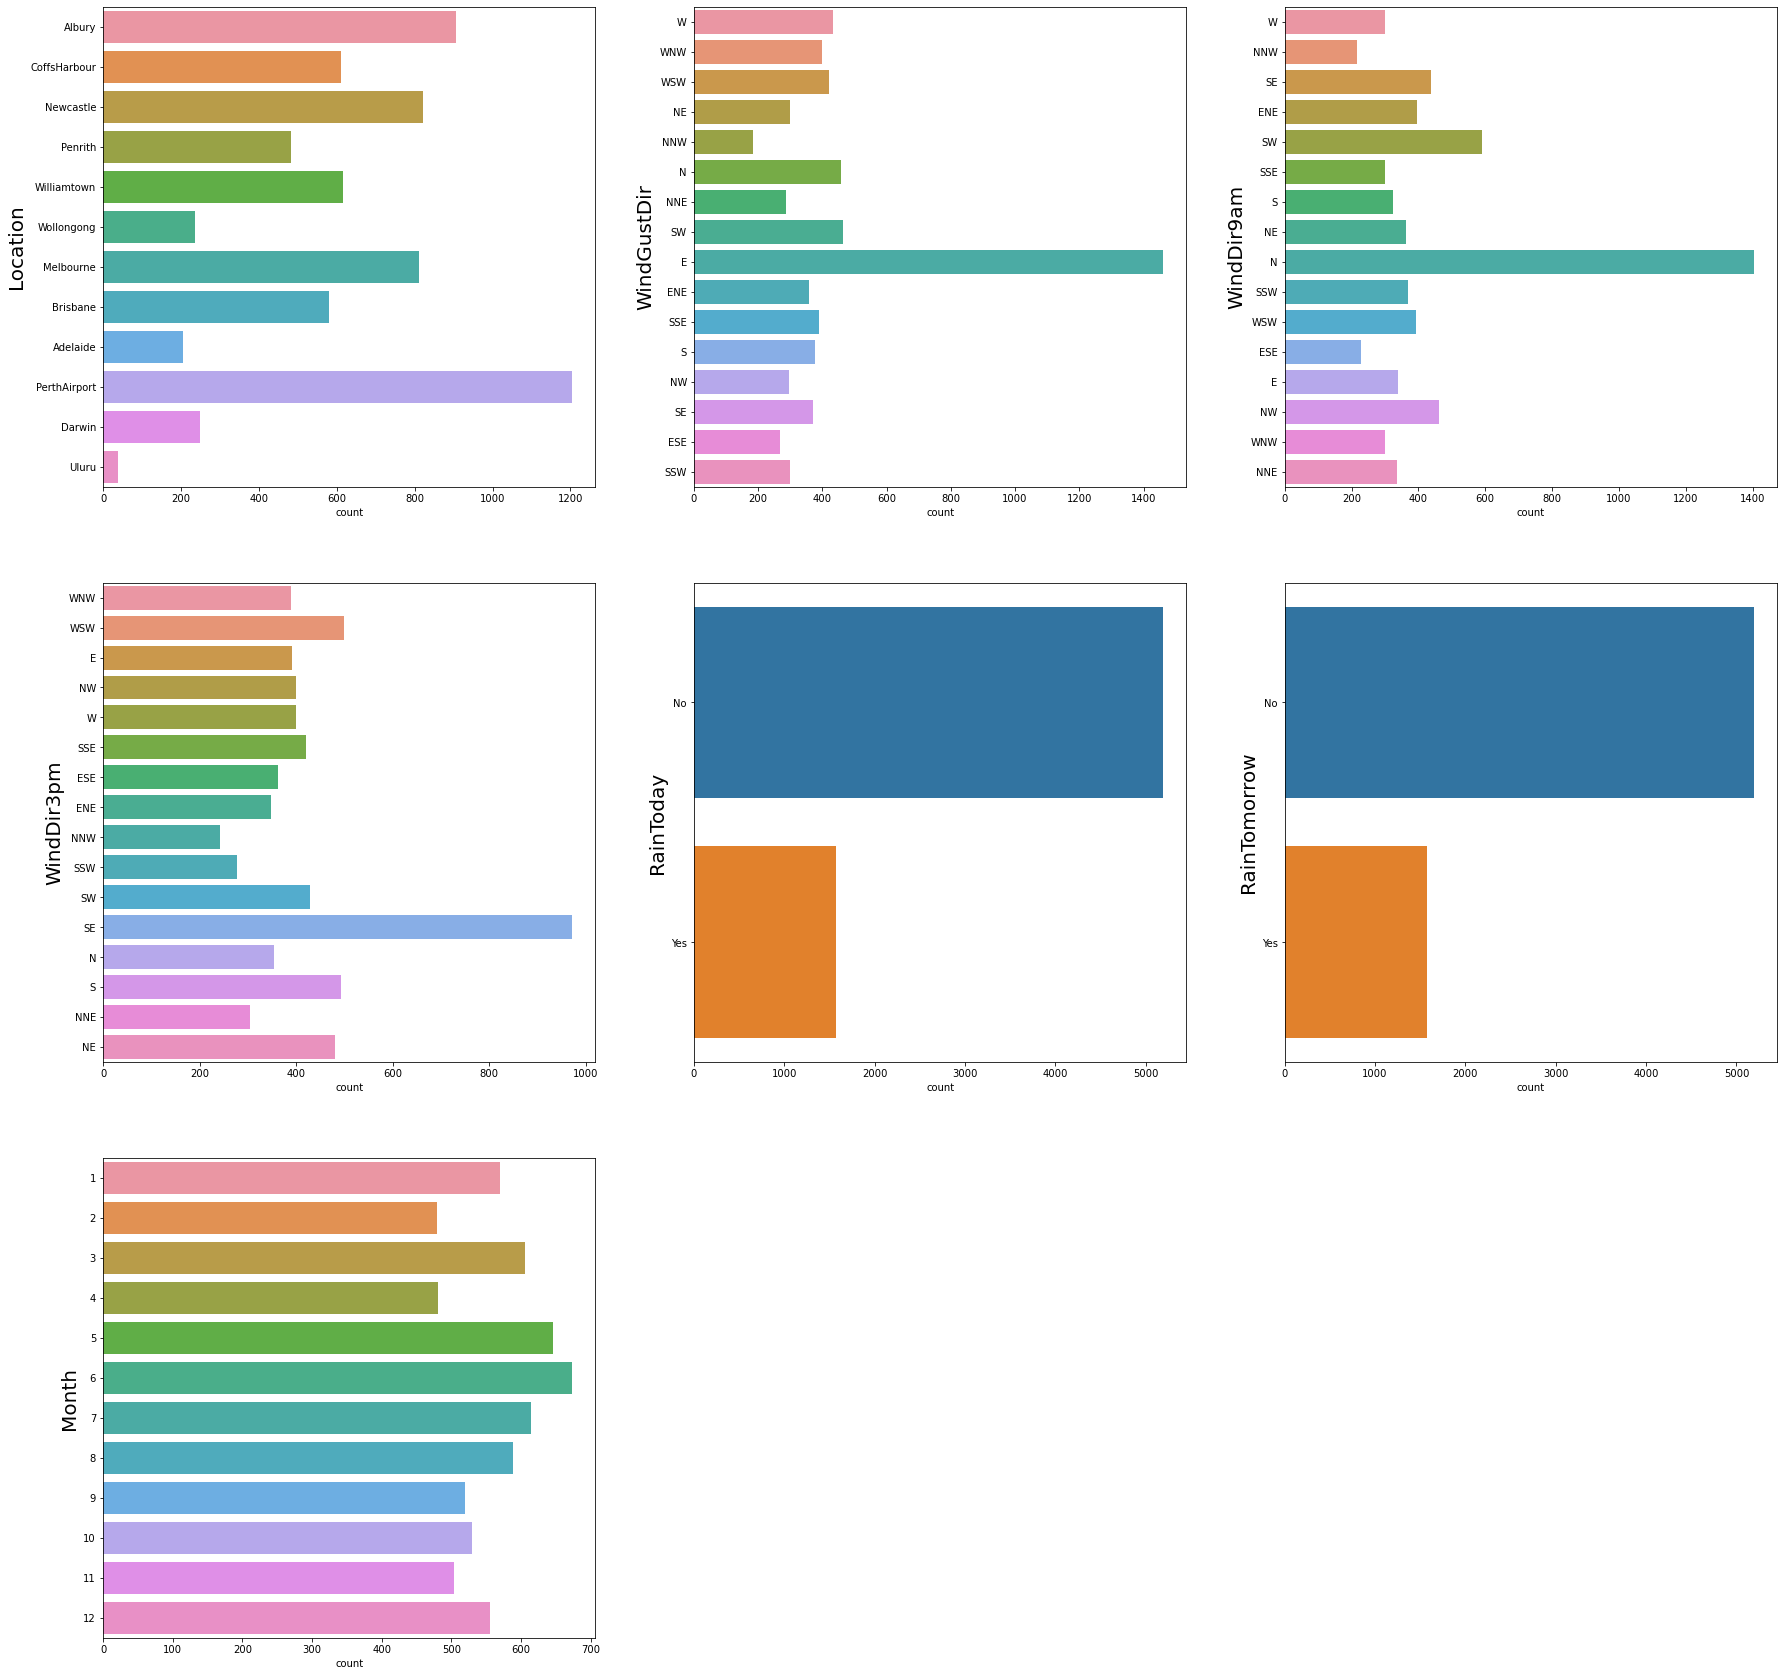

In [16]:
#Plotting count plots for categorical data

plt.figure(figsize=(30,30))
plotnumber = 1
for column in C_data:
    if plotnumber <=18:
        ax= plt.subplot(3,3,plotnumber)
        sns.countplot(data=C_data,y=C_data[column])
        plt.ylabel(column,fontsize=20)
        
    plotnumber+=1
plt.show

observations:

Location: Most of the data is collected from Perth and Albury

Wind Gust Direction: Most of the time the wind blows in E direction

Rain today and Rain Tomorrow imply it does not rain most of the days in Australia

In [17]:
C_data.nunique()

Location        12
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
Month           12
dtype: int64

Comparing Rainfall to Month and Location

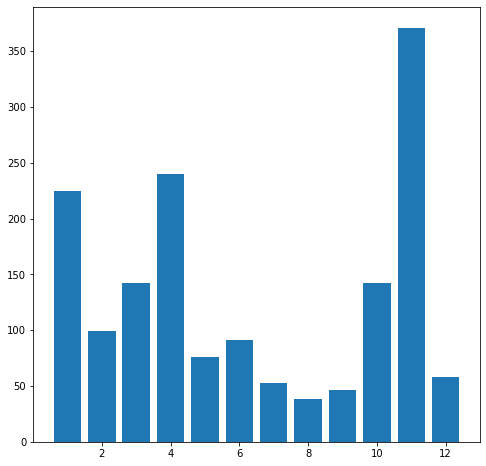

In [18]:
plt.figure(figsize=(8,8))
x=data['Rainfall']
y=data['Month']
plt.bar(y,x)
plt.show()

From the above graph we conclude:
Australia recieves most of the rainfall in the month of November followed by January and April

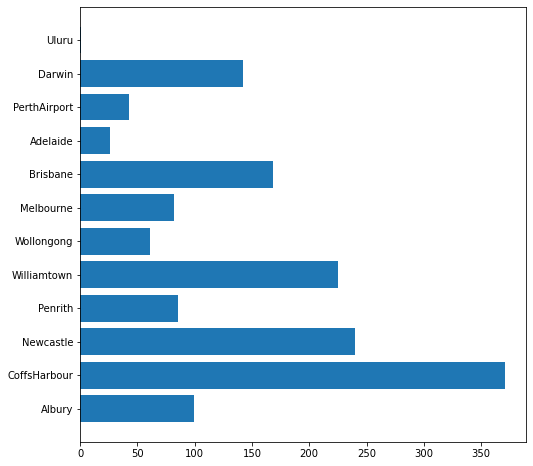

In [19]:
plt.figure(figsize=(8,8))
x=data['Rainfall']
y=data['Location']
plt.barh(y,x)
plt.show()

From the above graph we conclude: CoffsHarbour recieves more rainfall 

Uluru recieved no rain at all

Now Lets plot graphs for numerical data

<function matplotlib.pyplot.show(close=None, block=None)>

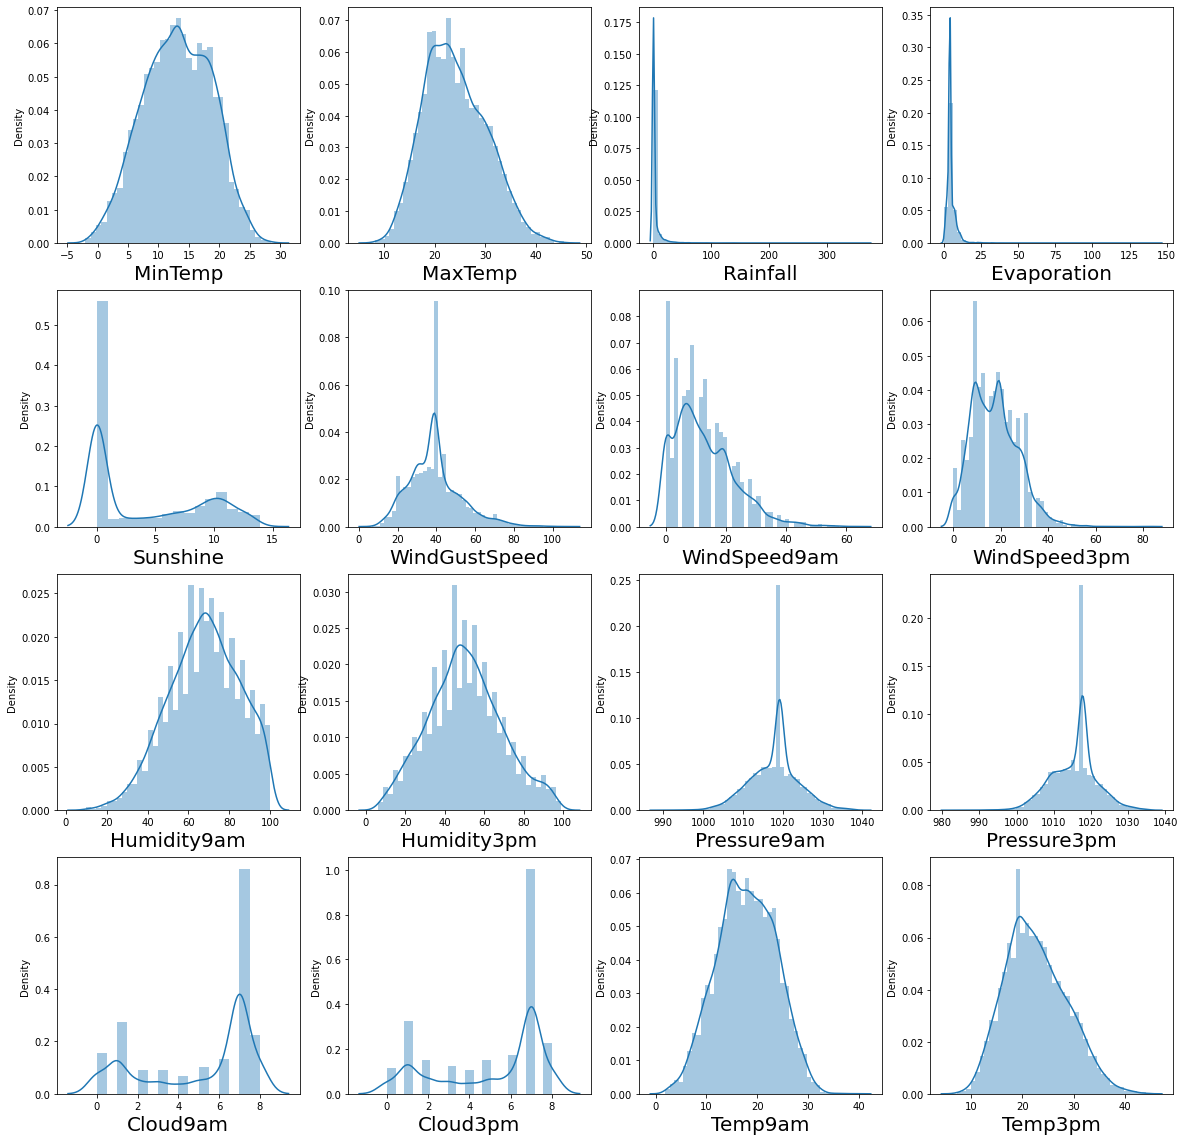

In [20]:
#Plotting graphs for numerical data
plt.figure(figsize=(20,20))
plotnumber = 1
for column in N_data:
    if plotnumber <=16:
        ax= plt.subplot(4,4,plotnumber)
        sns.distplot(N_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

Most of the columns look good but could be slightly skewed hinting the presence of outliers

In [21]:
#checking for skewness
data.skew()

MinTemp          -0.084215
MaxTemp           0.340945
Rainfall         13.637400
Evaporation      13.306305
Sunshine          0.556181
WindGustSpeed     0.779739
WindSpeed9am      0.950821
WindSpeed3pm      0.569346
Humidity9am      -0.256862
Humidity3pm       0.160760
Pressure9am      -0.125743
Pressure3pm      -0.200091
Cloud9am         -0.727856
Cloud3pm         -0.699539
Temp9am          -0.036020
Temp3pm           0.366886
Month             0.021988
dtype: float64

In [22]:
# Encoding the categorical columns
L_encoder = LabelEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=L_encoder.fit_transform(data[i].values.reshape(-1,1))

In [23]:
data.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,1,13.4,22.9,0.6,4.0,0.0,13,44.0,13,14,...,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0,12
1,1,7.4,25.1,0.0,4.0,0.0,14,44.0,6,15,...,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0,12
2,1,12.9,25.7,0.0,4.0,0.0,15,46.0,13,15,...,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0,12
3,1,9.2,28.0,0.0,4.0,0.0,4,24.0,9,0,...,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0,12
4,1,17.5,32.3,1.0,4.0,0.0,13,41.0,1,7,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12
5,1,14.6,29.7,0.2,4.0,0.0,14,56.0,13,13,...,23.0,1009.2,1005.4,7.0,7.0,20.6,28.9,0,0,12
6,1,14.3,25.0,0.0,4.0,0.0,13,50.0,12,13,...,19.0,1009.6,1008.2,1.0,7.0,18.1,24.6,0,0,12
7,1,7.7,26.7,0.0,4.0,0.0,13,35.0,10,13,...,19.0,1013.4,1010.1,7.0,7.0,16.3,25.5,0,0,12
8,1,9.7,31.9,0.0,4.0,0.0,6,80.0,9,7,...,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,0,1,12
9,1,13.1,30.1,1.4,4.0,0.0,13,28.0,8,10,...,27.0,1007.0,1005.7,7.0,7.0,20.1,28.2,1,0,12


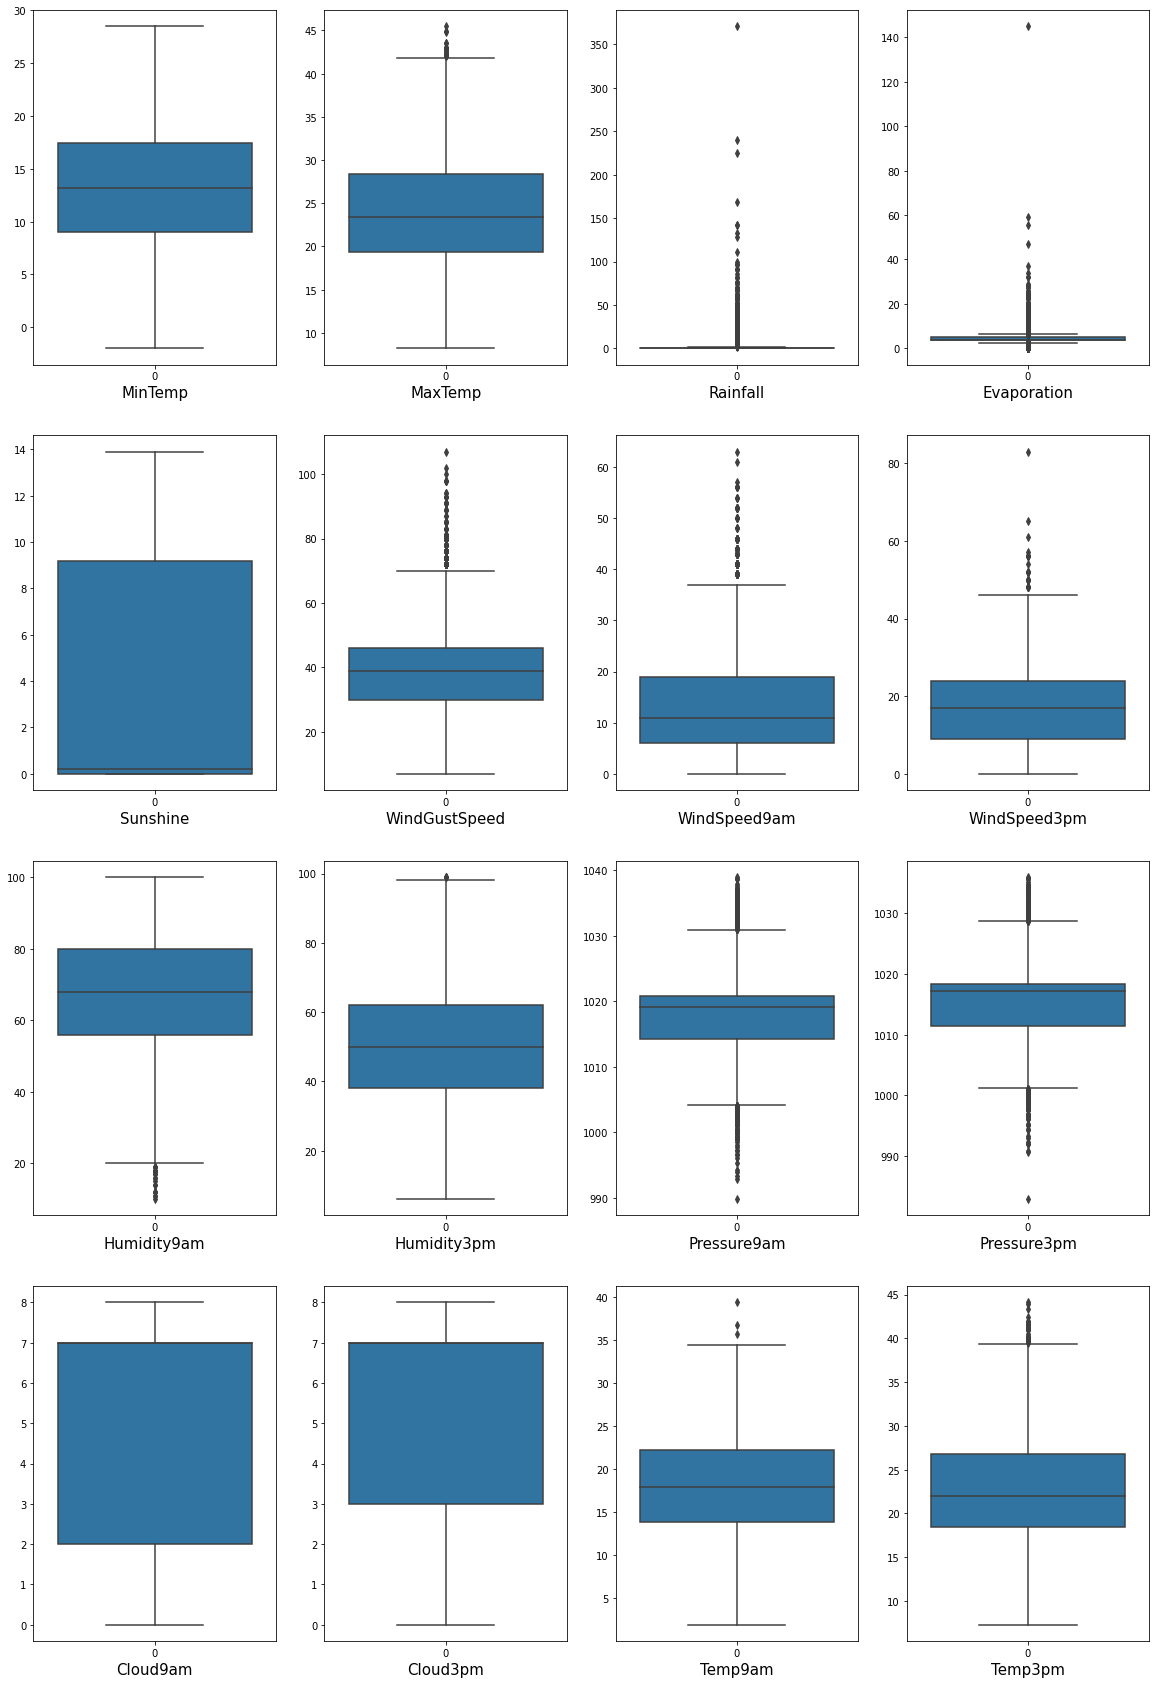

In [24]:
# Checking for outliers using boxplot
plt.figure(figsize=(20,30))
graph =1
for column in N_data:
    if graph <=16:
        plt.subplot(4,4,graph)
        ax=sns.boxplot(data=N_data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

From the above graphs we can say that most of the numerical columns have outliers which is leading to skewness of data 

In [25]:
# Using z-score to detect and treat the outliers
features=data[['Rainfall','Evaporation']]
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(features))
threshold=3
outliers=np.where(z>3)
outliers

(array([ 431,  462,  699,  713,  770,  796,  797,  802,  928,  935,  949,
         979,  980, 1008, 1009, 1011, 1138, 1148, 1149, 1151, 1202, 1203,
        1237, 1241, 1264, 1265, 1357, 1411, 1412, 1413, 1479, 1480, 1481,
        1513, 1661, 1673, 1680, 1774, 1819, 1873, 2108, 2116, 2201, 2231,
        2265, 2429, 2488, 2541, 2593, 2676, 2677, 2735, 2827, 2835, 2849,
        2849, 2855, 2863, 2869, 2877, 2883, 2890, 2891, 2897, 2898, 2900,
        2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939, 2947, 2953, 2961,
        2967, 2975, 2989, 3003, 3045, 3051, 3101, 3143, 3150, 3157, 3164,
        3172, 3178, 3185, 3192, 3206, 3213, 3221, 3227, 3248, 3248, 3256,
        3260, 3350, 3419, 3421, 3430, 3449, 3571, 3607, 3621, 3716, 3741,
        3755, 3756, 3767, 3798, 3821, 4059, 4158, 4362, 4422, 4436, 4458,
        4472, 4473, 4486, 4519, 4778, 4817, 4818, 4826, 4857, 4920, 4921,
        5186, 5192, 5199, 5213, 5220, 5241, 5248, 5255, 5262, 5267, 5297,
        5298, 5448, 5506, 5619, 5662, 

In [26]:
new_data=data.drop(outliers[0])
new_data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,1,13.4,22.9,0.6,4.0,0.0,13,44.0,13,14,...,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0,12
1,1,7.4,25.1,0.0,4.0,0.0,14,44.0,6,15,...,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0,12
2,1,12.9,25.7,0.0,4.0,0.0,15,46.0,13,15,...,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0,12
3,1,9.2,28.0,0.0,4.0,0.0,4,24.0,9,0,...,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0,12
4,1,17.5,32.3,1.0,4.0,0.0,13,41.0,1,7,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,9,2.8,23.4,0.0,4.0,0.0,0,31.0,9,1,...,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0,6
6758,9,3.6,25.3,0.0,4.0,0.0,6,22.0,9,3,...,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0,6
6759,9,5.4,26.9,0.0,4.0,0.0,3,37.0,9,14,...,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0,6
6760,9,7.8,27.0,0.0,4.0,0.0,9,28.0,10,3,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6


In [27]:
new_data.skew()

Location         0.000642
MinTemp         -0.072033
MaxTemp          0.331144
Rainfall         3.537577
Evaporation      1.406461
Sunshine         0.542635
WindGustDir      0.108800
WindGustSpeed    0.766133
WindDir9am       0.229591
WindDir3pm      -0.121454
WindSpeed9am     0.949384
WindSpeed3pm     0.570063
Humidity9am     -0.252490
Humidity3pm      0.156691
Pressure9am     -0.109137
Pressure3pm     -0.188846
Cloud9am        -0.712626
Cloud3pm        -0.686687
Temp9am         -0.039445
Temp3pm          0.359184
RainToday        1.335557
RainTomorrow     1.309473
Month            0.021576
dtype: float64

In [28]:
new_data = new_data.reset_index()
new_data=new_data.drop(columns=['index'])

In [29]:
features=new_data['Rainfall']
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(features))
threshold=3
outliers=np.where(z>3)
outliers

(array([  17,  145,  146,  296,  356,  459,  508,  542,  588,  607,  640,
         641,  646,  680,  681,  682,  722,  723,  728,  734,  795,  825,
         865,  899,  901,  924,  932,  940,  953,  968, 1136, 1167, 1215,
        1249, 1268, 1331, 1420, 1454, 1468, 1472, 1480, 1488, 1499, 1505,
        1506, 1584, 1655, 1744, 1745, 1773, 1790, 1802, 1841, 1908, 1912,
        1914, 1923, 1971, 1993, 2023, 2025, 2028, 2043, 2067, 2093, 2121,
        2140, 2141, 2167, 2168, 2384, 2450, 2463, 2497, 2528, 2529, 2600,
        2610, 2611, 2627, 2637, 2750, 2772, 2825, 2826, 2835, 2842, 2848,
        2929, 2970, 2984, 3014, 3093, 3164, 3225, 3239, 3263, 3264, 3316,
        3320, 3410, 3411, 3413, 3455, 3473, 3475, 3513, 3515, 3530, 3531,
        3552, 3559, 3709, 3799, 3866, 3922, 3931, 3958, 3970, 3973, 3984,
        3995, 4020, 4021, 4097, 4278, 4288, 4299, 4334, 4391, 4393, 4404,
        4406, 4407, 4422, 4437, 4553, 4600, 4617, 4656, 4670, 4699, 4703,
        4714, 4726, 4737, 4738, 4751, 

In [30]:
new_data=new_data.drop(outliers[0],axis=0)
new_data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,1,13.4,22.9,0.6,4.0,0.0,13,44.0,13,14,...,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0,12
1,1,7.4,25.1,0.0,4.0,0.0,14,44.0,6,15,...,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0,12
2,1,12.9,25.7,0.0,4.0,0.0,15,46.0,13,15,...,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0,12
3,1,9.2,28.0,0.0,4.0,0.0,4,24.0,9,0,...,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0,12
4,1,17.5,32.3,1.0,4.0,0.0,13,41.0,1,7,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,9,2.8,23.4,0.0,4.0,0.0,0,31.0,9,1,...,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0,6
6602,9,3.6,25.3,0.0,4.0,0.0,6,22.0,9,3,...,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0,6
6603,9,5.4,26.9,0.0,4.0,0.0,3,37.0,9,14,...,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0,6
6604,9,7.8,27.0,0.0,4.0,0.0,9,28.0,10,3,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6


In [31]:
new_data.skew()

Location        -0.001702
MinTemp         -0.062202
MaxTemp          0.323435
Rainfall         2.992610
Evaporation      1.396638
Sunshine         0.526784
WindGustDir      0.118212
WindGustSpeed    0.768905
WindDir9am       0.242733
WindDir3pm      -0.109315
WindSpeed9am     0.962819
WindSpeed3pm     0.580055
Humidity9am     -0.238523
Humidity3pm      0.157119
Pressure9am     -0.079421
Pressure3pm     -0.162928
Cloud9am        -0.688334
Cloud3pm        -0.668781
Temp9am         -0.041891
Temp3pm          0.353048
RainToday        1.514325
RainTomorrow     1.384980
Month            0.018026
dtype: float64

In [32]:
data_loss=((6761-6407)/6761)*100
data_loss

5.235911847359858

Since the skewness has reduced and the data loss is less than 10% we will use the new_data


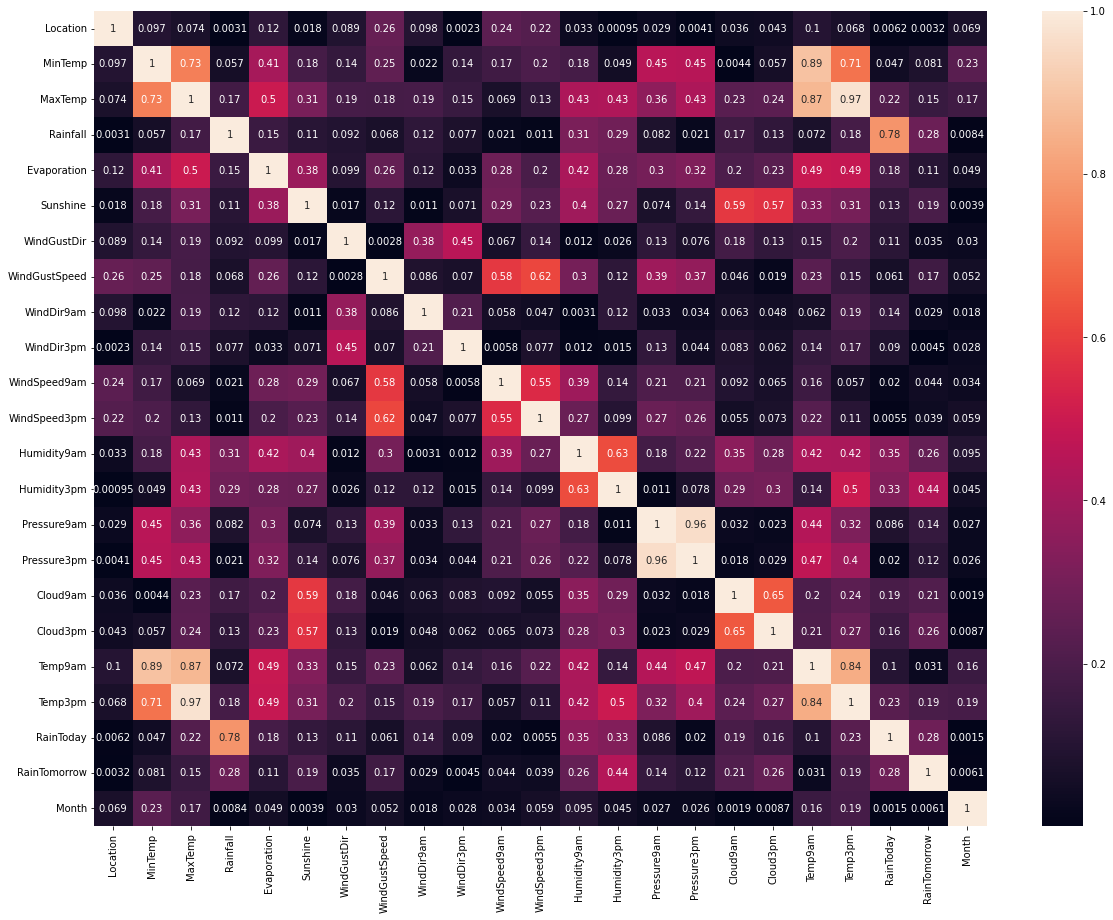

In [33]:
# Plotting heat map to check for multicollinerity and labelv//s feature relationship
df_corr = new_data.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()


We observe:

Multicollinearity:
1. Max Temp and Min Temp seem to be highly corelated to each other
2. Temp9am and Temp 9pm seem to be highly corelated to each other, and to MinTemp and MaxTemp
3. Humidity9am and Humidity3pm also look corelated
4. Pressure9am and Pressure3pm are highly corelated

All the above could lead to multicollinerity which we will confirm by calculating VIF in futhur steps



Rainfall as Label:

Year, Month and Location have no relation(almost=0) with the label

Hence deleting the above columns for Regression analysis    

In [34]:
r_data= new_data.drop(columns=['Month','Location','Temp9am','Pressure3pm','WindSpeed9am','WindSpeed3pm','MinTemp'])
r_data.shape

(6407, 16)

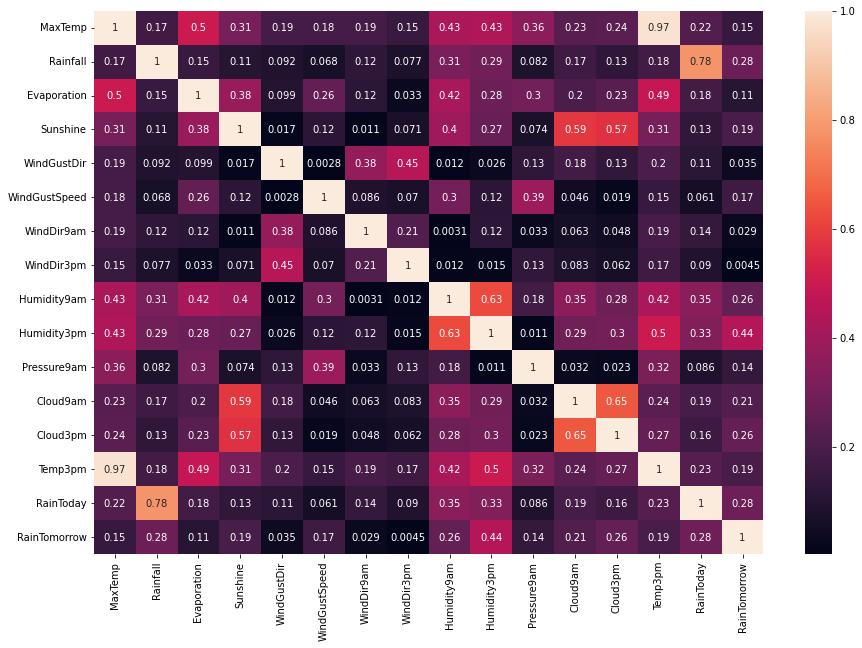

In [35]:
# Plotting heat map to check for multicollinerity and labelv//s feature relationship
#Regression data
df_corr = r_data.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()

# Regression Model Building:

In [36]:
# Dividing data into feature and label
X= r_data.drop(columns=['Rainfall'])
Y= r_data['Rainfall']

In [37]:
#Applying PowerTransformer
pt = PowerTransformer()
X_scaled = pd.DataFrame(pt.fit_transform(X), columns=X.columns)


In [38]:
X_scaled

,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,-0.123268,-0.11103,-0.959518,1.122157,0.494235,1.243692,1.327211,0.212340,-1.572737,-1.719112,1.174208,0.762471,-0.077487,-0.497218,-0.523944
1,0.232424,-0.11103,-0.959518,1.241819,0.494235,-0.051034,1.525555,-1.328818,-1.384867,-1.248272,0.728029,0.762471,0.333720,-0.497218,-0.523944
2,0.326365,-0.11103,-0.959518,1.357360,0.632732,1.243692,1.525555,-1.642469,-1.080607,-1.735258,0.728029,-1.207457,0.155894,-0.497218,-0.523944
3,0.675478,-0.11103,-0.959518,-0.267245,-1.175090,0.556327,-1.864271,-1.275391,-1.963583,-0.091002,0.728029,0.762471,0.676124,-0.497218,-0.523944
4,1.287113,-0.11103,-0.959518,1.122157,0.279010,-1.471681,-0.132928,0.890888,-0.902603,-1.215615,0.728029,1.239355,1.146398,-0.497218,-0.523944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,-0.040802,-0.11103,-0.959518,-1.444501,-0.517844,0.556327,-1.575704,-0.948385,-1.447007,1.096069,0.728029,0.762471,0.023542,-0.497218,-0.523944
6403,0.263877,-0.11103,-0.959518,0.114490,-1.383889,0.556327,-1.058811,-0.667918,-1.636378,0.907533,0.728029,0.762471,0.365558,-0.497218,-0.523944
6404,0.510612,-0.11103,-0.959518,-0.488772,-0.023613,0.556327,1.327211,-0.837035,-1.447007,0.481819,0.728029,0.762471,0.615106,-0.497218,-0.523944
6405,0.525755,-0.11103,-0.959518,0.591607,-0.787138,0.738853,-1.058811,-0.948385,-1.447007,0.211377,-0.835655,-1.207457,0.599769,-0.497218,-0.523944


In [39]:
Y.skew()

2.9926100942313303

In [40]:
X_scaled.skew()

MaxTemp         -0.014267
Evaporation      0.028881
Sunshine         0.171935
WindGustDir     -0.248016
WindGustSpeed    0.014597
WindDir9am      -0.140005
WindDir3pm      -0.249630
Humidity9am     -0.066061
Humidity3pm     -0.036232
Pressure9am      0.005707
Cloud9am        -0.575632
Cloud3pm        -0.530360
Temp3pm         -0.012314
RainToday        1.514325
RainTomorrow     1.384980
dtype: float64

After applying powertransform the skewness is under control and data looks good

In [41]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['feature']= X.columns
vif

,vif,feature
0,24.130170,MaxTemp
1,1.463776,Evaporation
2,1.687516,Sunshine
3,1.510005,WindGustDir
4,1.401963,WindGustSpeed
5,1.230480,WindDir9am
6,1.299565,WindDir3pm
7,2.372728,Humidity9am
8,2.553120,Humidity3pm
9,1.488912,Pressure9am


MaxTemp and Temp3pm have high VIFs
Deleting Temp3pm and check if VIF has reduced

In [42]:
X_scaled=X_scaled.drop(columns=['Temp3pm'])

In [43]:
vif1= pd.DataFrame()
vif1['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif1['feature']= X_scaled.columns
vif1

,vif,feature
0,1.837768,MaxTemp
1,1.462906,Evaporation
2,1.687289,Sunshine
3,1.507265,WindGustDir
4,1.390130,WindGustSpeed
5,1.230057,WindDir9am
6,1.288227,WindDir3pm
7,2.289484,Humidity9am
8,2.157946,Humidity3pm
9,1.488893,Pressure9am


Now that all the features have vifs less than 5 we can go ahead and build our model

In [44]:
#traintestsplit
lr = LinearRegression()
for i in range(200,500):
    x_train,x_test,y_train,y_test = train_test_split (X_scaled,Y, test_size=0.3, random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print ("At random state ",i,"the model performs well")
        print ("Acuraccy of training model :",r2_score(y_train,pred_train)*100)
        print ("Accuracy of testing model :",r2_score(y_test,pred_test)*100)
        print ("\n-----------------------------------------\n")

At random state  202 the model performs well
Acuraccy of training model : 61.59559597086566
Accuracy of testing model : 61.700516497789735

-----------------------------------------

At random state  203 the model performs well
Acuraccy of training model : 61.557172168702245
Accuracy of testing model : 61.7359745995792

-----------------------------------------

At random state  210 the model performs well
Acuraccy of training model : 61.56207478116025
Accuracy of testing model : 61.84757759713406

-----------------------------------------

At random state  225 the model performs well
Acuraccy of training model : 61.51271790090117
Accuracy of testing model : 61.903532871810775

-----------------------------------------

At random state  226 the model performs well
Acuraccy of training model : 61.50508086126847
Accuracy of testing model : 61.98498187026171

-----------------------------------------

At random state  229 the model performs well
Acuraccy of training model : 61.71469469424

Selecting the random state as 415 since the r2 score for test and train data is almost equal

In [45]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (X_scaled,Y, test_size=0.3, random_state = 415)

In [46]:
# Model Selection
def model_selection (algorithm, x_train,y_train,x_test,y_test):
    algorithm.fit(x_train,y_train)
    pred_train = algorithm.predict(x_train)
    pred_test = algorithm.predict(x_test)
    mse = mean_squared_error(y_test,pred_test)

    print (algorithm)
    print ("Acuraccy of training model :",r2_score(y_train,pred_train))
    print ("Accuracy of testing model :",r2_score(y_test,pred_test))
    print ("RMSE : ",sqrt(mse))
    print ("\n-----------------------------------------\n")

In [47]:
#Training Model
#Linear Regression
lr= LinearRegression()
model_selection(lr,x_train,y_train,x_test,y_test)

reg=Ridge()
model_selection(reg,x_train,y_train,x_test,y_test)

lasso=Lasso()
model_selection(lasso,x_train,y_train,x_test,y_test)


#Decision Tree
dtr = DecisionTreeRegressor()
model_selection(dtr,x_train,y_train,x_test,y_test)

#Random Forest 
rf= RandomForestRegressor()
model_selection(rf,x_train,y_train,x_test,y_test)

#Support Vector Regressor:
svr = SVR()
model_selection(svr,x_train,y_train,x_test,y_test)

#AdaBoost
ada = AdaBoostRegressor()
model_selection(ada,x_train,y_train,x_test,y_test)

#XGBoost
xg = xgb.XGBRegressor()
model_selection(xg,x_train,y_train,x_test,y_test)



LinearRegression()
Acuraccy of training model : 0.6161780291628491
Accuracy of testing model : 0.6161762314411161
RMSE :  1.803852550848553

-----------------------------------------

Ridge()
Acuraccy of training model : 0.616177995866259
Accuracy of testing model : 0.6161740568955748
RMSE :  1.8038576606857846

-----------------------------------------

Lasso()
Acuraccy of training model : 0.48615563910308457
Accuracy of testing model : 0.4947070878527098
RMSE :  2.069696691565263

-----------------------------------------

DecisionTreeRegressor()
Acuraccy of training model : 1.0
Accuracy of testing model : 0.2517103154068874
RMSE :  2.518662531272869

-----------------------------------------

RandomForestRegressor()
Acuraccy of training model : 0.9482086290470829
Accuracy of testing model : 0.6078705977567436
RMSE :  1.8232650451475767

-----------------------------------------

SVR()
Acuraccy of training model : 0.6208197228400056
Accuracy of testing model : 0.5525906593612606
RMSE

In [48]:
# Hyperparameter Tuning:
#Random Forest
parameters = {'n_estimators':(25,50,75,100),
    'max_features':['auto','sqrt','log2'],
    'max_depth': (8,12,15),
    'min_samples_leaf': (5,8,10),
    'min_samples_split':range(5,7,10)
    }

clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print ("Random Forests: \n",clf.best_params_)

#Ridge
parameters = {'alpha':np.arange(0.001,0.1,0.01),
             'solver':['auto','saga','lsqr']
             }

clf = GridSearchCV(reg,parameters)
clf.fit(x_train,y_train)
print ("Ridge: \n",clf.best_params_)



Random Forests: 
 {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 75}
Ridge: 
 {'alpha': 0.09099999999999998, 'solver': 'saga'}


In [51]:
rf1= RandomForestRegressor(n_estimators=75,max_features='auto', max_depth = 12, min_samples_leaf = 8, min_samples_split = 5)
model_selection(rf1,x_train,y_train,x_test,y_test)

reg1 = Ridge(alpha=0.009, solver='saga')
model_selection(reg1,x_train,y_train,x_test,y_test)

reg2 = Ridge(alpha=0.009, solver='auto')
model_selection(reg2,x_train,y_train,x_test,y_test)

RandomForestRegressor(max_depth=12, max_features='auto', min_samples_leaf=8,
                      min_samples_split=5, n_estimators=75)
Acuraccy of training model : 0.7843869231522145
Accuracy of testing model : 0.6225780119199182
RMSE :  1.7887461056612055

-----------------------------------------

Ridge(alpha=0.009, solver='saga')
Acuraccy of training model : 0.6161780206154102
Accuracy of testing model : 0.6161774290112642
RMSE :  1.803849736742408

-----------------------------------------

Ridge(alpha=0.009)
Acuraccy of training model : 0.6161780291601504
Accuracy of testing model : 0.6161762121698788
RMSE :  1.8038525961329683

-----------------------------------------



In [52]:
# Saving Model
import pickle
filename= 'Rain_reg.pkl'
pickle.dump(rf1,open(filename, 'wb'))

In [53]:
#Final Prediction
a= np.array(y_test)
predicted=np.array (rf1.predict(x_test))
df = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df

,Orignal,Predicted
0,0.0,0.036595
1,0.0,0.029226
2,0.6,0.290685
3,0.0,0.031411
4,0.0,0.023469
...,...,...
1918,0.0,0.046142
1919,0.0,0.201232
1920,0.0,0.024112
1921,14.4,5.964084


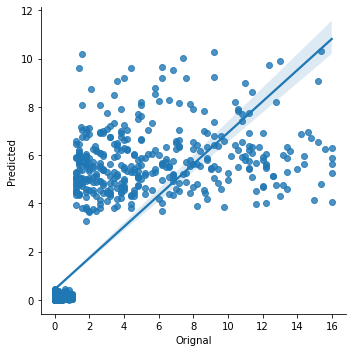

In [54]:
sns.lmplot(x='Orignal',y='Predicted',data=df)

Building Classification model

In [55]:
# Dividing data into feature and label
x= new_data.drop(columns=['RainTomorrow'])
y= new_data['RainTomorrow']

In [56]:
#Applying PowerTransformer
pt = PowerTransformer()
x_scaled = pd.DataFrame(pt.fit_transform(x), columns=x.columns)

In [57]:
x_scaled

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month
0,-1.456049,0.087297,-0.123268,1.036741,-0.11103,-0.959518,1.122157,0.494235,1.243692,1.327211,...,0.212340,-1.572737,-1.719112,-1.421693,1.174208,0.762471,-0.155603,-0.077487,-0.497218,1.554333
1,-1.456049,-0.997265,0.232424,-0.624092,-0.11103,-0.959518,1.241819,0.494235,-0.051034,1.525555,...,-1.328818,-1.384867,-1.248272,-1.311928,0.728029,0.762471,-0.103618,0.333720,-0.497218,1.554333
2,-1.456049,-0.002110,0.326365,-0.624092,-0.11103,-0.959518,1.357360,0.632732,1.243692,1.525555,...,-1.642469,-1.080607,-1.735258,-1.169910,0.728029,-1.207457,0.553177,0.155894,-0.497218,1.554333
3,-1.456049,-0.668907,0.675478,-0.624092,-0.11103,-0.959518,-0.267245,-1.175090,0.556327,-1.864271,...,-1.275391,-1.963583,-0.091002,-0.510093,0.728029,0.762471,0.052212,0.676124,-0.497218,1.554333
4,-1.456049,0.815309,1.287113,1.391188,-0.11103,-0.959518,1.122157,0.279010,-1.471681,-0.132928,...,0.890888,-0.902603,-1.215615,-1.592965,0.728029,1.239355,0.000289,1.146398,-0.497218,1.554333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,1.160127,-1.854334,-0.040802,-0.624092,-0.11103,-0.959518,-1.444501,-0.517844,0.556327,-1.575704,...,-0.948385,-1.447007,1.096069,0.752990,0.728029,0.762471,-1.340376,0.023542,-0.497218,-0.073932
6403,1.160127,-1.702793,0.263877,-0.624092,-0.11103,-0.959518,0.114490,-1.383889,0.556327,-1.058811,...,-0.667918,-1.636378,0.907533,0.545905,0.728029,0.762471,-1.200246,0.365558,-0.497218,-0.073932
6404,1.160127,-1.366108,0.510612,-0.624092,-0.11103,-0.959518,-0.488772,-0.023613,0.556327,1.327211,...,-0.837035,-1.447007,0.481819,0.154356,0.728029,0.762471,-0.920649,0.615106,-0.497218,-0.073932
6405,1.160127,-0.924031,0.525755,-0.624092,-0.11103,-0.959518,0.591607,-0.787138,0.738853,-1.058811,...,-0.948385,-1.447007,0.211377,0.103799,-0.835655,-1.207457,-0.467959,0.599769,-0.497218,-0.073932


In [58]:
x_scaled.skew()

Location        -0.189246
MinTemp         -0.110248
MaxTemp         -0.014267
Rainfall         1.134038
Evaporation      0.028881
Sunshine         0.171935
WindGustDir     -0.248016
WindGustSpeed    0.014597
WindDir9am      -0.140005
WindDir3pm      -0.249630
WindSpeed9am    -0.107878
WindSpeed3pm    -0.037607
Humidity9am     -0.066061
Humidity3pm     -0.036232
Pressure9am      0.005707
Pressure3pm      0.007893
Cloud9am        -0.575632
Cloud3pm        -0.530360
Temp9am         -0.060101
Temp3pm         -0.012314
RainToday        1.514325
Month           -0.155438
dtype: float64

In [59]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Vif= pd.DataFrame()
Vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
Vif['feature']= x_scaled.columns
Vif

,vif,feature
0,1.191443,Location
1,8.600974,MinTemp
2,25.143676,MaxTemp
3,6.346237,Rainfall
4,1.489040,Evaporation
5,1.914541,Sunshine
6,1.614474,WindGustDir
7,2.245858,WindGustSpeed
8,1.304076,WindDir9am
9,1.398372,WindDir3pm


Since MaxTemp,Temp3pm,Temp9am,Pressure9am and Pressure3pm have a  high vifs:

Finding AvgTemp and Avg Pressure and deleting the above columns

In [60]:
x_scaled['AvgTemp'] = x_scaled[['MaxTemp', 'MinTemp']].mean(axis=1)
x_scaled['AvgPressure']= x_scaled[['Pressure9am','Pressure3pm']].mean(axis=1)
x_scaled= x_scaled.drop(columns=['MaxTemp','MinTemp','Temp9am','Temp3pm','Pressure9am','Pressure3pm'])

In [61]:
x_scaled

,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,Month,AvgTemp,AvgPressure
0,-1.456049,1.036741,-0.11103,-0.959518,1.122157,0.494235,1.243692,1.327211,0.848063,0.740085,0.212340,-1.572737,1.174208,0.762471,-0.497218,1.554333,-0.017986,-1.570402
1,-1.456049,-0.624092,-0.11103,-0.959518,1.241819,0.494235,-0.051034,1.525555,-0.823221,0.556533,-1.328818,-1.384867,0.728029,0.762471,-0.497218,1.554333,-0.382420,-1.280100
2,-1.456049,-0.624092,-0.11103,-0.959518,1.357360,0.632732,1.243692,1.525555,0.772196,0.918222,-1.642469,-1.080607,0.728029,-1.207457,-0.497218,1.554333,0.162128,-1.452584
3,-1.456049,-0.624092,-0.11103,-0.959518,-0.267245,-1.175090,0.556327,-1.864271,0.068621,-0.835192,-1.275391,-1.963583,0.728029,0.762471,-0.497218,1.554333,0.003285,-0.300548
4,-1.456049,1.391188,-0.11103,-0.959518,1.122157,0.279010,-1.471681,-0.132928,-0.387308,0.366907,0.890888,-0.902603,0.728029,1.239355,-0.497218,1.554333,1.051211,-1.404290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,1.160127,-0.624092,-0.11103,-0.959518,-1.444501,-0.517844,0.556327,-1.575704,0.264501,-0.589352,-0.948385,-1.447007,0.728029,0.762471,-0.497218,-0.073932,-0.947568,0.924529
6403,1.160127,-0.624092,-0.11103,-0.959518,0.114490,-1.383889,0.556327,-1.058811,0.264501,-0.835192,-0.667918,-1.636378,0.728029,0.762471,-0.497218,-0.073932,-0.719458,0.726719
6404,1.160127,-0.624092,-0.11103,-0.959518,-0.488772,-0.023613,0.556327,1.327211,-0.146504,-0.835192,-0.837035,-1.447007,0.728029,0.762471,-0.497218,-0.073932,-0.427748,0.318088
6405,1.160127,-0.624092,-0.11103,-0.959518,0.591607,-0.787138,0.738853,-1.058811,0.264501,-1.100275,-0.948385,-1.447007,-0.835655,-1.207457,-0.497218,-0.073932,-0.199138,0.157588


In [62]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Vif1= pd.DataFrame()
Vif1['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
Vif1['feature']= x_scaled.columns
Vif1

,vif,feature
0,1.166074,Location
1,6.272787,Rainfall
2,1.484829,Evaporation
3,1.878752,Sunshine
4,1.604198,WindGustDir
5,2.159108,WindGustSpeed
6,1.248503,WindDir9am
7,1.308536,WindDir3pm
8,2.027462,WindSpeed9am
9,1.929921,WindSpeed3pm


Data looks good now all the vifs are less than 10

Lets look at the label

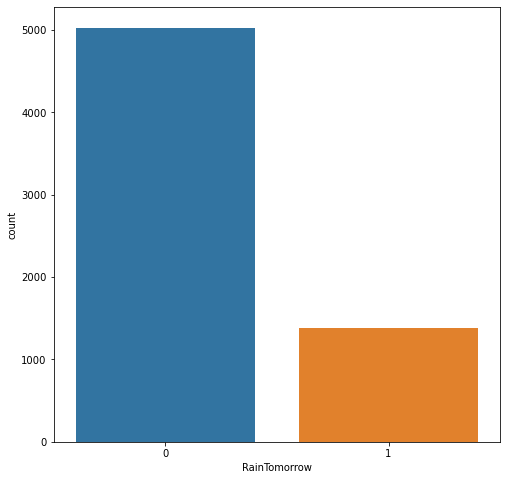

In [63]:
plt.figure(figsize=(8,8))
sns.countplot(y)
plt.show()

Label is imbalanced
Balancing Label using SMOTE

In [64]:
from imblearn.over_sampling import SMOTE
#traintestsplit
x_train_,x_test,y_train,y_test = train_test_split (x_scaled,y, test_size=0.3, random_state = 285)

In [65]:
x_train,y_train = SMOTE().fit_resample(x_train,y_train)

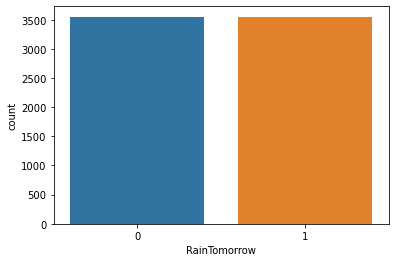

In [66]:
sns.countplot(y_train)
plt.show()

The label is now balanced

In [67]:
#traintestsplit
lg = LogisticRegression()
for i in range(300,500):
    x_train,x_test,y_train,y_test = train_test_split (x_scaled,y, test_size=0.3, random_state = i)
    lg.fit(x_train,y_train)
    pred_train = lg.predict(x_train)
    pred_test = lg.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print ("At random state ",i,"the model performs well")
        print ("Acuraccy of training model :",accuracy_score(y_train,pred_train)*100)
        print ("Accuracy of testing model :",accuracy_score(y_test,pred_test)*100)
        print ("\n-----------------------------------------\n")

At random state  304 the model performs well
Acuraccy of training model : 83.69759143621766
Accuracy of testing model : 83.93135725429018

-----------------------------------------

At random state  305 the model performs well
Acuraccy of training model : 83.60838537020517
Accuracy of testing model : 84.19136765470618

-----------------------------------------

At random state  306 the model performs well
Acuraccy of training model : 83.67528991971454
Accuracy of testing model : 83.87935517420698

-----------------------------------------

At random state  312 the model performs well
Acuraccy of training model : 83.56378233719893
Accuracy of testing model : 84.03536141445657

-----------------------------------------

At random state  313 the model performs well
Acuraccy of training model : 83.65298840321141
Accuracy of testing model : 83.82735309412377

-----------------------------------------

At random state  319 the model performs well
Acuraccy of training model : 83.6083853702051

At random state  426 the model performs well
Acuraccy of training model : 83.96520963425513
Accuracy of testing model : 83.56734269370774

-----------------------------------------

At random state  428 the model performs well
Acuraccy of training model : 83.78679750223014
Accuracy of testing model : 83.51534061362455

-----------------------------------------

At random state  431 the model performs well
Acuraccy of training model : 83.56378233719893
Accuracy of testing model : 84.19136765470618

-----------------------------------------

At random state  434 the model performs well
Acuraccy of training model : 83.89830508474576
Accuracy of testing model : 83.72334893395735

-----------------------------------------

At random state  435 the model performs well
Acuraccy of training model : 83.58608385370205
Accuracy of testing model : 84.34737389495581

-----------------------------------------

At random state  439 the model performs well
Acuraccy of training model : 83.8760035682426

In [68]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (x_scaled,y, test_size=0.3, random_state = 441)

In [69]:
# Model Selection
def model_selection (algorithm, x_train,y_train,x_test,y_test):
    algorithm.fit(x_train,y_train)
    pred_train = algorithm.predict(x_train)
    pred_test = algorithm.predict(x_test)
    auc_score = roc_auc_score(y_test,pred_test)
    
    print(algorithm)
    print ("Acuraccy of training model :",accuracy_score(y_train,pred_train))
    print ("Accuracy of testing model :",accuracy_score(y_test,pred_test))
    print ("Confusion Matrix \n",confusion_matrix(y_test,pred_test))
    print ("\n-----------------------------------------\n")
    
    # Calculate ROC curve
    fpr, tpr, algorithm = roc_curve(y_test, pred_test)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    print ("\nAUC score: ",auc_score)
    print ("\n -------------------------------------------------------------\n")
    
        

LogisticRegression()
Acuraccy of training model : 0.8378679750223015
Accuracy of testing model : 0.8377535101404057
Confusion Matrix 
 [[1424   88]
 [ 224  187]]

-----------------------------------------



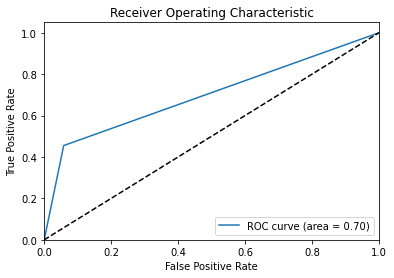


AUC score:  0.6983933881744101

 -------------------------------------------------------------

KNeighborsClassifier()
Acuraccy of training model : 0.8744424620874219
Accuracy of testing model : 0.8247529901196048
Confusion Matrix 
 [[1419   93]
 [ 244  167]]

-----------------------------------------



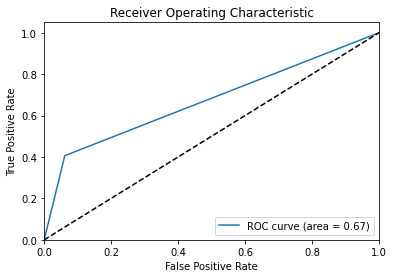


AUC score:  0.6724090487776618

 -------------------------------------------------------------

DecisionTreeClassifier()
Acuraccy of training model : 1.0
Accuracy of testing model : 0.7691107644305772
Confusion Matrix 
 [[1295  217]
 [ 227  184]]

-----------------------------------------



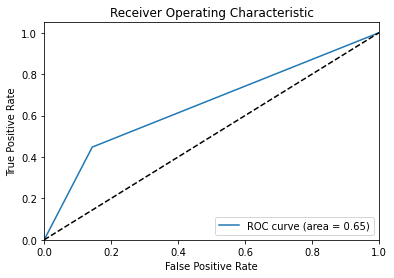


AUC score:  0.6520850229791835

 -------------------------------------------------------------

RandomForestClassifier()
Acuraccy of training model : 1.0
Accuracy of testing model : 0.8413936557462298
Confusion Matrix 
 [[1433   79]
 [ 226  185]]

-----------------------------------------



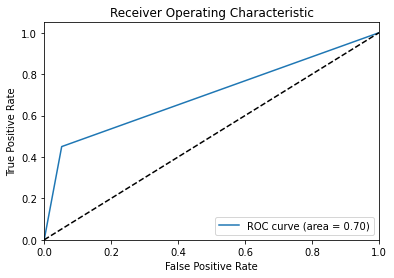


AUC score:  0.6989364886262697

 -------------------------------------------------------------

SVC()
Acuraccy of training model : 0.8753345227475469
Accuracy of testing model : 0.8403536141445658
Confusion Matrix 
 [[1441   71]
 [ 236  175]]

-----------------------------------------



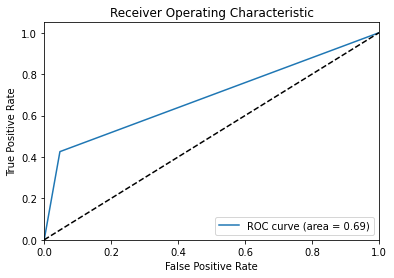


AUC score:  0.6894165411501179

 -------------------------------------------------------------

AdaBoostClassifier()
Acuraccy of training model : 0.8528099910793934
Accuracy of testing model : 0.8455538221528861
Confusion Matrix 
 [[1425   87]
 [ 210  201]]

-----------------------------------------



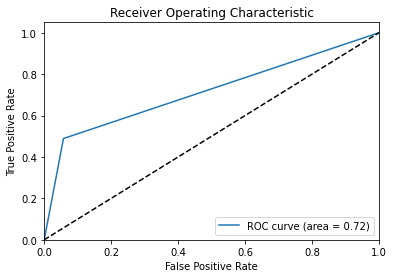


AUC score:  0.7157557061754142

 -------------------------------------------------------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Acuraccy of training model : 0.9957627118644068
Accuracy of testing model : 0.8377535101404057
Confusion Matrix 
 [[1416   96]
 [ 216  195]]

---------

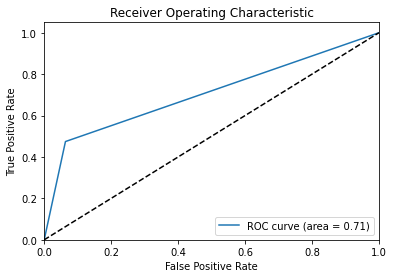


AUC score:  0.705480245626231

 -------------------------------------------------------------



In [70]:
#Logistic Regression
lr= LogisticRegression()
model_selection(lr,x_train,y_train,x_test,y_test)

#KNN
knn= KNeighborsClassifier()
model_selection(knn,x_train,y_train,x_test,y_test)

#Decision Tree
dtc = DecisionTreeClassifier()
model_selection(dtc,x_train,y_train,x_test,y_test)

#Random Forest 
rfc= RandomForestClassifier()
model_selection(rfc,x_train,y_train,x_test,y_test)

#SVC
svc= SVC()
model_selection(svc,x_train,y_train,x_test,y_test)

#AdaBoost
ada = AdaBoostClassifier()
model_selection(ada,x_train,y_train,x_test,y_test)

#XGBoost
xg = xgb.XGBClassifier()
model_selection(xg,x_train,y_train,x_test,y_test)



Since AdaBoost and XGBoost have good accuracy and most auc lets Tune tits parameters and check if we can make the model better

In [75]:
# Hyperparameter Tuning :

#AdaBoost
params = {'n_estimators':[50,75,100],
              'learning_rate':[0.05,0.1,0.01]
         }

clf = GridSearchCV(ada,params)
clf.fit(x_train,y_train)
print ("AdaBoost: \n",clf.best_params_)

#XGBoost
params = {
    'learning_rate': [0.1,0.05,0.01],
    'max_depth': [5,8,10],
    'gamma': [0, 0.5, 1]
}

clf = GridSearchCV(xg,params)
clf.fit(x_train,y_train)
print ("XGBoost: \n",clf.best_params_)


AdaBoost: 
 {'learning_rate': 0.1, 'n_estimators': 100}
XGBoost: 
 {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5}


AdaBoostClassifier(learning_rate=0.1, n_estimators=100)
Acuraccy of training model : 0.8369759143621767
Accuracy of testing model : 0.8398335933437338
Confusion Matrix 
 [[1462   50]
 [ 258  153]]

-----------------------------------------



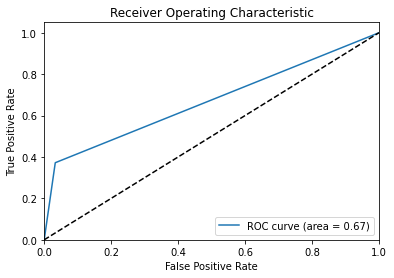


AUC score:  0.6695969953269224

 -------------------------------------------------------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Acuraccy of training model : 0.9136931311329171
Accuracy of testing model : 0.842953718148726
Confusion Matrix 
 [[1421   91]
 [ 211  200]]

-----------------

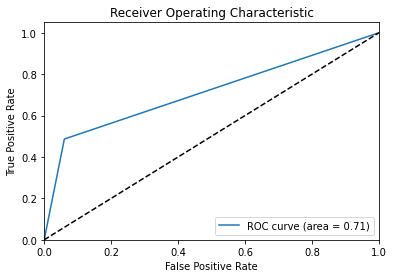


AUC score:  0.7132164098404974

 -------------------------------------------------------------



In [77]:
#AdaBoost
ada1= AdaBoostClassifier(learning_rate=0.1,n_estimators=100)
model_selection(ada1,x_train,y_train,x_test,y_test)

#XGBoost
xg1 = xgb.XGBClassifier(gamma=0,learning_rate=0.1,max_depth=5)
model_selection(xg1,x_train,y_train,x_test,y_test)


After observing the results of Hyperparameter Tunning Selecting Adaboost as the best model

In [78]:
# Saving Model
import pickle
filename= 'Rain_clf.pkl'
pickle.dump(ada,open(filename, 'wb'))

In [80]:
#Final Prediction
a= L_encoder.inverse_transform(np.array(y_test))
predicted=L_encoder.inverse_transform(np.array (ada.predict(x_test)))
df1 = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df1

,Orignal,Predicted
0,No,No
1,Yes,Yes
2,No,Yes
3,No,No
4,No,No
...,...,...
1918,No,No
1919,No,No
1920,No,No
1921,Yes,No
